In [217]:
import pandas as pd 
import numpy as np 

In [218]:
df = pd.read_csv("BA_reviews.csv")
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Good domestic flight operat...
1,1,Not Verified | Failed at all basic travel fund...
2,2,✅ Trip Verified | They lost my baggage in a v...
3,3,✅ Trip Verified | Late boarding led to a one ...
4,4,✅ Trip Verified | As usual the flight is delay...
...,...,...
995,995,✅ Trip Verified | Miami to London Heathrow. A...
996,996,Not Verified | London Heathrow to Milan Malpen...
997,997,Not Verified | Calgary to Rome via London. My...
998,998,✅ Trip Verified | London to Bangkok. Flew Bri...


In [219]:
import re 

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [220]:
cleaned_df = []

for i in df['reviews']:
    cleaned_df.append(clean_text(i))

cleaned_df

[' Trip Verified   Good domestic flight operated by BA Cityflyer Ground service at checkin Edinburgh airport was particularly friendly and helpful The flight departed on time and arrived earlier than scheduled A complimentary drink and snack albeit tiny were served Generally it seems that the quality of the Cityflyer subsidiary is superior to the mainline British Airways flights',
 'Not Verified  Failed at all basic travel fundamentals 1 Our flight was delayed 2 Staff demanded that we check in our carry on luggage even though we met our carry on allowance The fact that we have a tight bus connection was totally ignored 3 Staff were quite unpleasant',
 ' Trip Verified   They lost my baggage in a very simple situation Its been three weeks and they dont care no communication whatsoever I was at the connection checkpoint at Heathrow 3hrs before my connecting flight the last leg of my trip An agent insists on checking in my hand luggage since my plane is full And then they lose it I claim i

In [221]:
def removing_verified_not_verified(text):
    clean = re.sub(r'\bTrip Verified\b','', text).strip()
    
    return clean

In [222]:
reviews = []
review_validity = []

for text in cleaned_df:
    if re.search(r'\bTrip Verified\b', text):
        reviews.append(re.sub(r'\bTrip Verified\b', '', text).strip())
        review_validity.append('Trip Verified')   
    elif re.search(r'\bNot Verified\b', text):
        reviews.append(re.sub(r'\bTrip Verified\b', '', text).strip())
        review_validity.append('Not Verified')  


In [223]:
data = {
    'Validity': review_validity,
    'Reviews':reviews
}


new_df = pd.DataFrame(data)
new_df

,Validity,Reviews
0,Trip Verified,Good domestic flight operated by BA Cityflyer ...
1,Not Verified,Not Verified Failed at all basic travel funda...
2,Trip Verified,They lost my baggage in a very simple situatio...
3,Trip Verified,Late boarding led to a one hour flight leaving...
4,Trip Verified,As usual the flight is delayed BA try to blame...
...,...,...
995,Trip Verified,Miami to London Heathrow As with many others w...
996,Not Verified,Not Verified London Heathrow to Milan Malpens...
997,Not Verified,Not Verified Calgary to Rome via London My w...
998,Trip Verified,London to Bangkok Flew British Airways for the...


In [224]:
new_df['Validity'].value_counts()

Validity
Trip Verified    798
Not Verified     202
Name: count, dtype: int64

In [225]:
from textblob import TextBlob
import nltk

In [226]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gutte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gutte\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [227]:
sentiment = []
polarity = []

for text in new_df['Reviews']:
    if TextBlob(text).sentiment.polarity >= 0.20:
        polarity.append(TextBlob(text).sentiment.polarity)
        sentiment.append('Positive')
    elif TextBlob(text).sentiment.polarity <= 0.20:
        sentiment.append('Negative')
        polarity.append(TextBlob(text).sentiment.polarity)
    else:
        print('error')


In [228]:
sentiment = pd.DataFrame(sentiment)
polarity = pd.DataFrame(polarity)

In [229]:
new_df['Sentiment'] = sentiment
new_df['polarity'] = polarity

In [230]:
new_df['Sentiment'].value_counts()

Sentiment
Negative    761
Positive    239
Name: count, dtype: int64

In [231]:
total_polarity = new_df['polarity'].mean()
total_polarity

0.07244986452680632

In [232]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [233]:
combined_text = ' '.join(new_df['Reviews'])

In [234]:
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(combined_text)

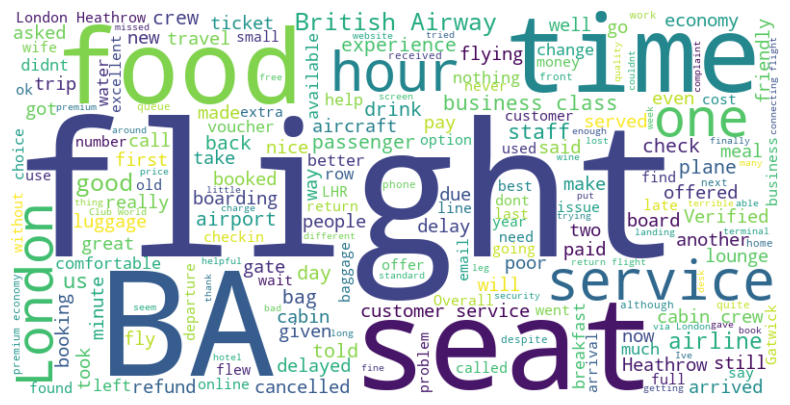

In [235]:
plt.figure(figsize = (10,5))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.show()

In [236]:
groupby = new_df.groupby('Validity')

In [237]:
negative_rows = new_df[new_df['Sentiment'] == 'Negative']

combined_negative = ' '.join(negative_rows['Reviews'])


In [238]:
wordcloud_neg = WordCloud(width = 800, height = 400, background_color = 'White').generate(combined_negative)

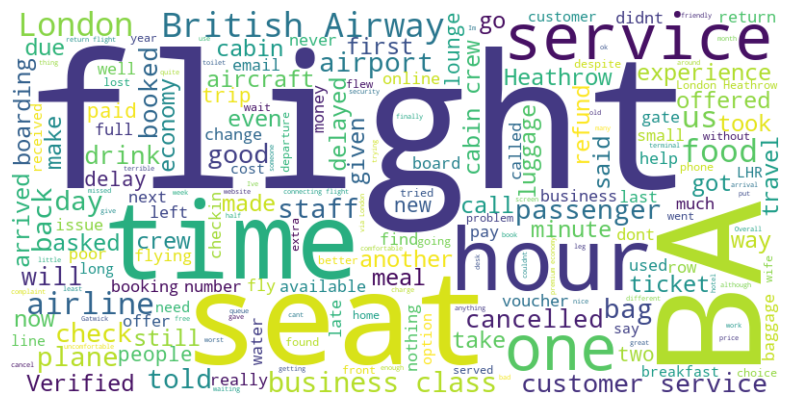

In [239]:
plt.figure(figsize = (10,5))
plt.imshow(wordcloud_neg , interpolation='bilinear')
plt.axis('off')
plt.show()

Analyzing on the bigrams

In [240]:
from nltk import bigrams 
from nltk.tokenize import word_tokenize 
from collections import Counter 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [241]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gutte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
lower_text = []
tokens = []
for text in new_df['Reviews']:
    lower_text.append(text.lower())

for text in new_df['Reviews']:
    token = word_tokenize(text)
    tokens.append(token)

merged_tokens = [ ]
for sublist in tokens:
    merged_tokens.extend(sublist)
    

stop_words = set(stopwords.words('english'))

filtered_stopwords = []

for token in merged_tokens:
    if token not in stop_words:
        filtered_stopwords.append(token)

stemmed_words  = []
stemmer = PorterStemmer()

for token in filtered_stopwords:
    stem = stemmer.stem(token)
    stemmed_words.append(stem)


In [243]:
bigrams_list = [ ]

for i in range(len(stemmed_words) - 1):
    two_words = (stemmed_words[i] , stemmed_words[i + 1])
    bigram = '_'.join(two_words)
    bigrams_list.append(bigram)

In [244]:
bigrams = ' '.join(bigrams_list)

In [245]:
wordcloud1 = WordCloud(height = 400, width = 800, background_color = 'white').generate(bigrams)

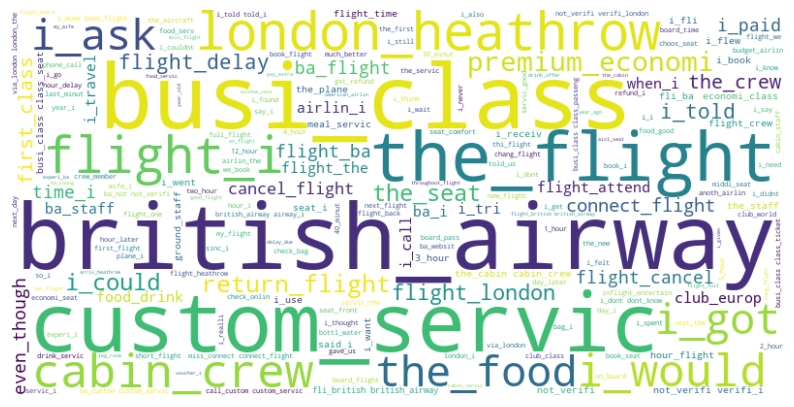

In [246]:
plt.figure(figsize = (10,8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [247]:
new_df['Reviews'][0]

'Good domestic flight operated by BA Cityflyer Ground service at checkin Edinburgh airport was particularly friendly and helpful The flight departed on time and arrived earlier than scheduled A complimentary drink and snack albeit tiny were served Generally it seems that the quality of the Cityflyer subsidiary is superior to the mainline British Airways flights'

In [248]:
import pandas as pd

data = [
    ("Flight Delays and Cancellations",
     ["delayed", "canceled", "missed connection", "rescheduled", "grounded", "postponed", "rerouted"]),
    
    ("Customer Service",
     ["rude staff", "unhelpful assistance", "poor communication", "lack of empathy", "disrespectful", "indifferent", "impolite"]),
    
    ("Baggage Handling",
     ["lost luggage", "damaged baggage", "baggage delay", "mishandled baggage", "missing suitcase", "broken items", "mishandled items"]),
    
    ("Seating and Comfort",
     ["uncomfortable seats", "insufficient legroom", "cramped space", "uncomfortable cushions", "hard seats", "narrow seats", "uncomfortable recline"]),
    
    ("In-Flight Experience",
     ["poor meal service", "bad food quality", "lack of vegetarian options", "outdated entertainment", "broken screens", "no Wi-Fi", "no power outlets"]),
    
    ("Booking and Reservation",
     ["incorrect booking", "unavailable seats", "reservation mix-up", "booking error", "seat allocation issue", "overbooking", "booking not honored"]),
    
    ("Security and Boarding",
     ["lengthy security lines", "chaotic boarding process", "security checkpoint delays", "security inefficiency", "boarding confusion", "unorganized boarding", "gate change confusion"]),

    ("Positive Experiences",
     ["efficient service", "friendly staff", "smooth journey", "helpful crew", "excellent communication", "quick resolution", "comfortable seats", "great in-flight entertainment", "delicious food", "pleasant experience",
      "easy booking process", "seamless reservation", "fast security checks", "organized boarding", "smooth takeoff and landing", "on-time departure", "attentive customer service", "well-handled baggage", "generous legroom", "modern amenities"]),
    
]

Categories_n_Keywords = pd.DataFrame(data, columns=["Category", "Keywords"])

In [249]:
Categories_n_Keywords

,Category,Keywords
0,Flight Delays and Cancellations,"[delayed, canceled, missed connection, resched..."
1,Customer Service,"[rude staff, unhelpful assistance, poor commun..."
2,Baggage Handling,"[lost luggage, damaged baggage, baggage delay,..."
3,Seating and Comfort,"[uncomfortable seats, insufficient legroom, cr..."
4,In-Flight Experience,"[poor meal service, bad food quality, lack of ..."
5,Booking and Reservation,"[incorrect booking, unavailable seats, reserva..."
6,Security and Boarding,"[lengthy security lines, chaotic boarding proc..."
7,Positive Experiences,"[efficient service, friendly staff, smooth jou..."


In [250]:
for index, row in new_df.iterrows():
    review = row["Reviews"]
    
    # Iterate through the rows of categories_df
    for _, category_row in Categories_n_Keywords.iterrows():
        category = category_row["Category"]
        keywords = category_row["Keywords"]
        
        # Check if any keyword is present in the review
        for keyword in keywords:
            if keyword in review:
                new_df.at[index, "Category"] = category
                break  # Exit loop once a match is found

In [251]:
new_df

,Validity,Reviews,Sentiment,polarity,Category
0,Trip Verified,Good domestic flight operated by BA Cityflyer ...,Positive,0.236111,NaN
1,Not Verified,Not Verified Failed at all basic travel funda...,Negative,-0.265714,Flight Delays and Cancellations
2,Trip Verified,They lost my baggage in a very simple situatio...,Negative,0.037500,NaN
3,Trip Verified,Late boarding led to a one hour flight leaving...,Negative,-0.082887,NaN
4,Trip Verified,As usual the flight is delayed BA try to blame...,Negative,-0.125000,Flight Delays and Cancellations
...,...,...,...,...,...
995,Trip Verified,Miami to London Heathrow As with many others w...,Positive,0.230556,NaN
996,Not Verified,Not Verified London Heathrow to Milan Malpens...,Negative,-0.125000,NaN
997,Not Verified,Not Verified Calgary to Rome via London My w...,Negative,0.072035,NaN
998,Trip Verified,London to Bangkok Flew British Airways for the...,Positive,0.201543,NaN


In [252]:
pie_data = new_df['Category'].value_counts()
pie_data

Category
Flight Delays and Cancellations    143
Positive Experiences                19
Customer Service                     8
Seating and Comfort                  7
Baggage Handling                     3
Booking and Reservation              2
Name: count, dtype: int64

In [253]:
pd.DataFrame(pie_data).to_csv('table.csv')

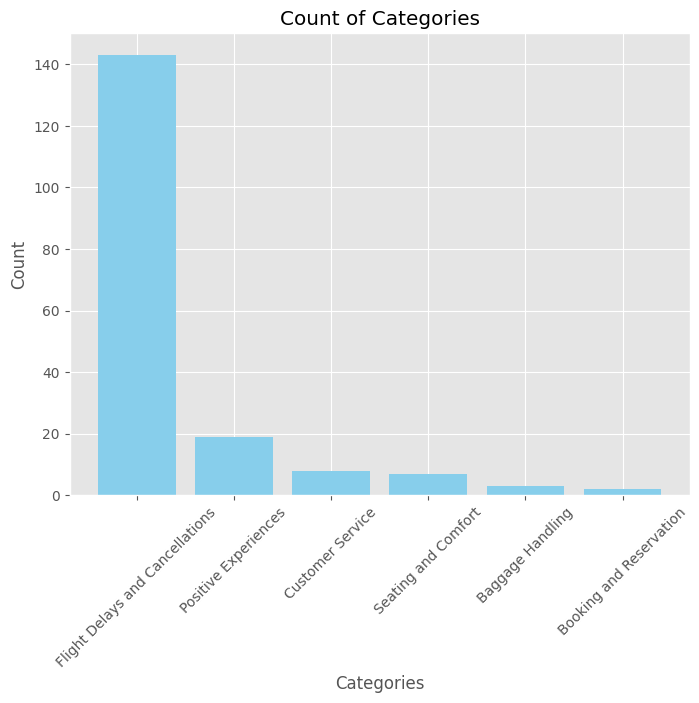

In [254]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.bar(pie_data.index, pie_data.values, color='skyblue')

# Add labels and title
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Count of Categories")

# Display the bar chart
plt.show()

In [255]:
dummy = new_df[new_df['Validity'] == 'Trip Verified']

In [256]:
pos_neg = dummy['Sentiment'].value_counts()
pos_neg

Sentiment
Negative    594
Positive    204
Name: count, dtype: int64

Text(0, 0.5, 'Value Counts')

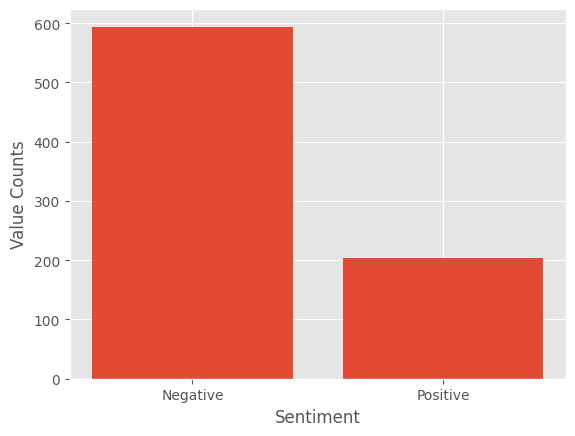

In [257]:
plt.style.use('ggplot')
plt.bar(pos_neg.index, pos_neg.values)
plt.xlabel('Sentiment')
plt.ylabel('Value Counts')

In [259]:
new_df

,Validity,Reviews,Sentiment,polarity,Category
0,Trip Verified,Good domestic flight operated by BA Cityflyer ...,Positive,0.236111,NaN
1,Not Verified,Not Verified Failed at all basic travel funda...,Negative,-0.265714,Flight Delays and Cancellations
2,Trip Verified,They lost my baggage in a very simple situatio...,Negative,0.037500,NaN
3,Trip Verified,Late boarding led to a one hour flight leaving...,Negative,-0.082887,NaN
4,Trip Verified,As usual the flight is delayed BA try to blame...,Negative,-0.125000,Flight Delays and Cancellations
...,...,...,...,...,...
995,Trip Verified,Miami to London Heathrow As with many others w...,Positive,0.230556,NaN
996,Not Verified,Not Verified London Heathrow to Milan Malpens...,Negative,-0.125000,NaN
997,Not Verified,Not Verified Calgary to Rome via London My w...,Negative,0.072035,NaN
998,Trip Verified,London to Bangkok Flew British Airways for the...,Positive,0.201543,NaN


In [264]:
x = new_df[new_df['Validity'] == 'Trip Verified']
x['Sentiment'].value_counts()

Sentiment
Negative    594
Positive    204
Name: count, dtype: int64

In [266]:
new_df['Validity'].value_counts()

Validity
Trip Verified    798
Not Verified     202
Name: count, dtype: int64

In [267]:
594/798

0.7443609022556391

Entity Recognization 

In [281]:
from nltk import ne_chunk,pos_tag
nltk.download('maxnet_ne_chunker')
nltk.download('words')

[nltk_data] Error loading maxnet_ne_chunker: Package
[nltk_data]     'maxnet_ne_chunker' not found in index
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\gutte\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [289]:
pos_tags = pos_tag(stemmed_words)   

In [300]:
named_entities = ne_chunk(pos_tags)

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker/english_ace_multiclass.pickle[0m

  Searched in:
    - 'C:\\Users\\gutte/nltk_data'
    - 'c:\\Users\\gutte\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'c:\\Users\\gutte\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'c:\\Users\\gutte\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\gutte\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'path_to_your_nltk_data_directory'
    - ''
**********************************************************************


In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import pipeline

c:\Users\gutte\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\gutte\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\gutte\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\gutte\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", tokenizer="dbmdz/bert-large-cased-finetuned-conll03-english")


ValueError: Could not load model dbmdz/bert-large-cased-finetuned-conll03-english with any of the following classes: (<class 'transformers.models.auto.modeling_auto.AutoModelForTokenClassification'>, <class 'transformers.models.auto.modeling_tf_auto.TFAutoModelForTokenClassification'>, <class 'transformers.models.bert.modeling_bert.BertForTokenClassification'>, <class 'transformers.models.bert.modeling_tf_bert.TFBertForTokenClassification'>).

In [303]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")


ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (c:\Users\gutte\AppData\Local\Programs\Python\Python39\lib\site-packages\typing_extensions.py)